In [71]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer, LancasterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.text import Text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer  #criar tf-idf
import re
import string
from wordcloud import WordCloud 
import wordcloud
import pandas as pd
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt
lemmatizer = WordNetLemmatizer()


In [5]:
with open('Romeo_and_Juliet.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

In [16]:
def pre_processamento(texto):

    # seleciona apenas letras e coloca todas em minúsculo
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

In [17]:
texto_limpo = pre_processamento(texto)#limpar

In [19]:
token = word_tokenize(texto_limpo)#tokenizar

In [63]:
tokenlemm = [lemmatizer.lemmatize(palavra) for palavra in token]

In [64]:
stops = stopwords.words("english")
tokenlemmsstop = [p for p in tokenlemm if p not in stops]
print(tokenlemmsstop)

['project', 'gutenberg', 'ebook', 'romeo', 'juliet', 'william', 'shakespeare', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'license', 'title', 'romeo', 'juliet', 'author', 'william', 'shakespeare', 'posting', 'date', 'may', 'ebook', 'release', 'date', 'november', 'etext', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'romeo', 'juliet', 'project', 'gutenberg', 'proud', 'cooperate', 'world', 'library', 'presentation', 'complete', 'work', 'william', 'shakespeare', 'reading', 'education', 'entertainment', 'however', 'neither', 'shareware', 'public', 'domain', 'library', 'future', 'condition', 'presentation', 'charge', 'may', 'made', 'access', 'material', 'encouraged', 'give', 'away', 'anyone', 'like', 'charge', 'allowed', 'complete', 'work', 'william', 'shakespeare', 'tragedy', 'romeo', 'juliet

In [50]:
nltk.FreqDist(tokenlemmsstop)  #metricas


FreqDist({'thou': 278, 'thy': 164, 'rom': 163, 'romeo': 162, 'love': 154, 'nurse': 150, 'thee': 138, 'come': 125, 'jul': 117, 'shall': 112, ...})

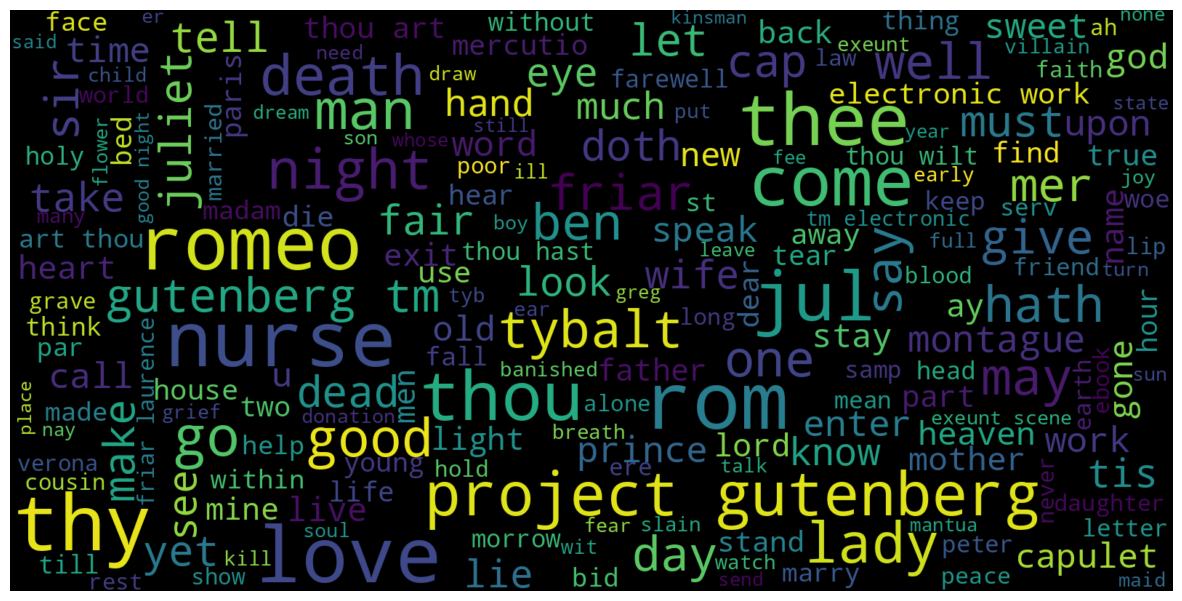

In [65]:
consolidated=' '.join(word for word in token)
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

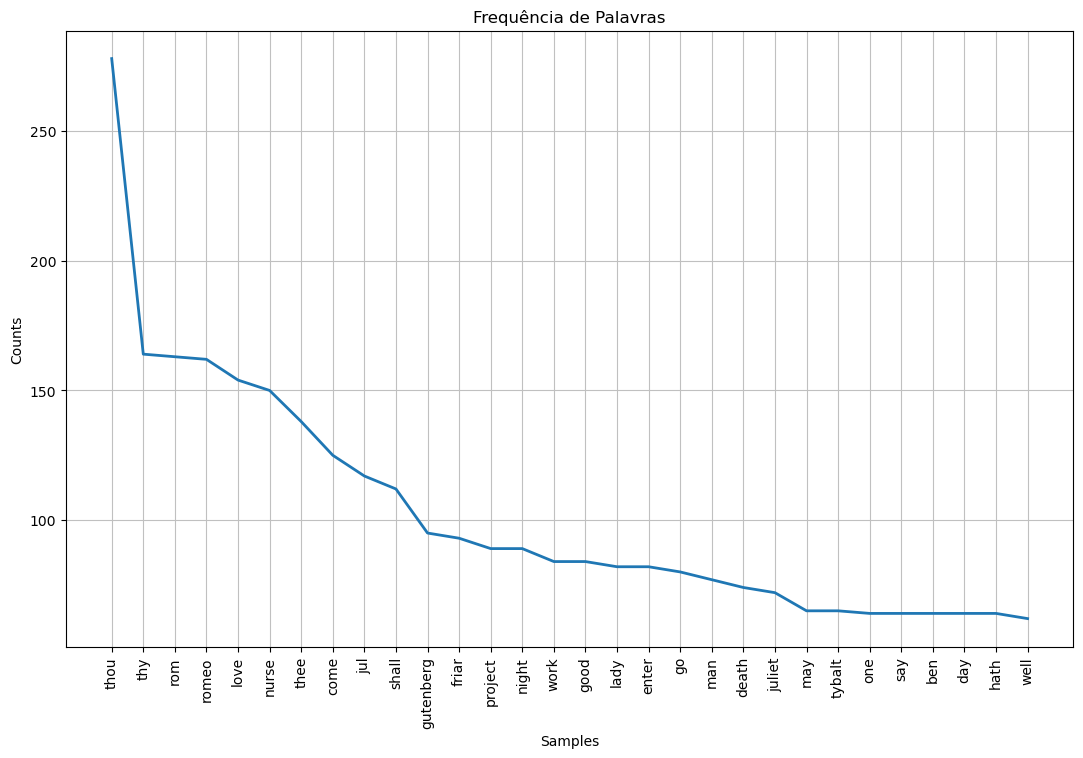

<AxesSubplot:title={'center':'Frequência de Palavras'}, xlabel='Samples', ylabel='Counts'>

In [76]:
from nltk.probability import FreqDist
fd = FreqDist(tokenlemmsstop)
plt.figure(figsize = (13, 8))
fd.plot(30, title = "Frequência de Palavras")

In [75]:
Text(token).collocations()

project gutenberg; literary archive; archive foundation; exeunt scene;
friar laurence; electronic works; thou art; united states; thou hast;
william shakespeare; public domain; thou wilt; gutenberg literary; art
thou; laurence cell; pglaf org; terms agreement; bite thumb; county
paris; electronic work
